# 1. Introduction

## 🎯 Objective  
The goal of this EDA is to uncover patterns in product, inventory, and supply chain data that can help improve **demand forecasting** and **supply chain efficiency**. We'll explore key drivers like stock levels, supplier performance, and inventory types to support better decision-making.

## 📦 Data Overview  
The dataset includes **[Number] rows** and **[Number] columns**, covering product-related data from **[Start Date]** to **[End Date]**. It provides detailed insights into:  
* Inventory levels  
* Supplier lead times  
* Warehouse distribution  
* Inventory categorization  

These features are crucial for analyzing product availability and demand fulfillment.


# 2. Univariate Analysis


   * Analyze each variable individually to understand its distribution and central tendencies.

## 2.1. Numerical Variables

### StockLevel:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\3_CLEANED DATA\inventory_data_Cleaned.csv.csv")

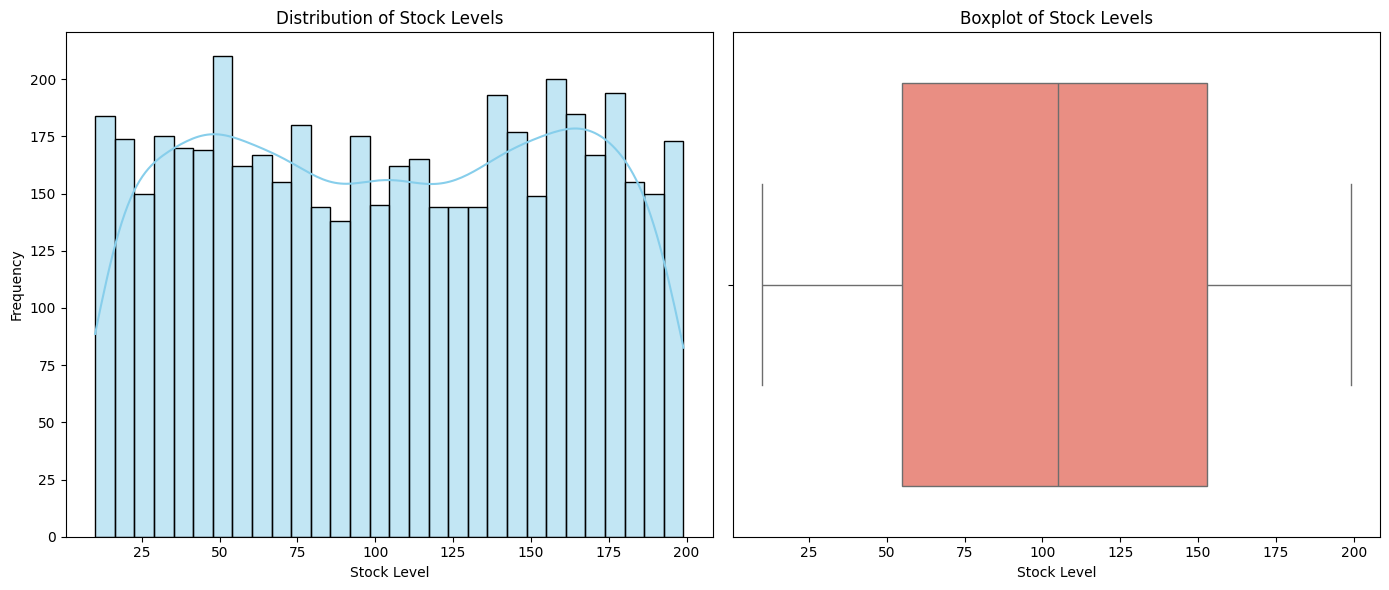

In [4]:
# Sample Data Load (replace with your actual dataframe)
# df = pd.read_csv("your_file.csv")

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['StockLevel'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Stock Levels')
plt.xlabel('Stock Level')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['StockLevel'], color='salmon')
plt.title('Boxplot of Stock Levels')
plt.xlabel('Stock Level')

plt.tight_layout()
plt.show()


## Stock Level Insights

* **Range:** Stock levels vary from 0 to 200.
* **Peaks:** Multiple peaks seen around 25–50, 75–100, 125–150, and 175–200.
* **Median:** About 100–110.
* **Spread:** Most values lie between 50–60 and 150–160.
* **Outliers:** None observed.
* **Summary:** Stock levels are spread across the range without extreme values.


## Supplier Delay

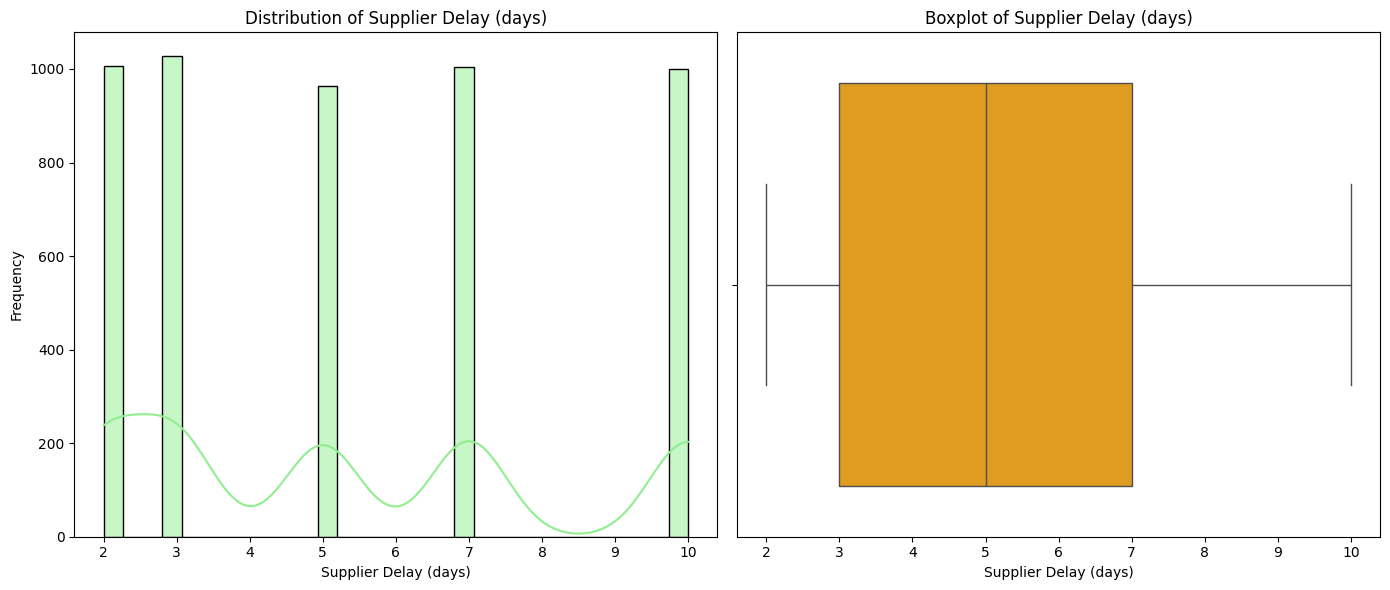

In [5]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['SupplierDelay(days)'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Supplier Delay (days)')
plt.xlabel('Supplier Delay (days)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SupplierDelay(days)'], color='orange')
plt.title('Boxplot of Supplier Delay (days)')
plt.xlabel('Supplier Delay (days)')

plt.tight_layout()
plt.show()


## Supplier Delay Insights

* **Pattern:** Delays mostly occur at fixed points — 2.5, 5, 7.5, and 10 days.
* **Typical Range:** Middle 50% fall between 3 and 9 days.
* **Median:** Around 6.25 days.
* **Outliers:** None found — all values are within range.


## 2.2 Categorical Variable

### ProductID

Total unique products: 500


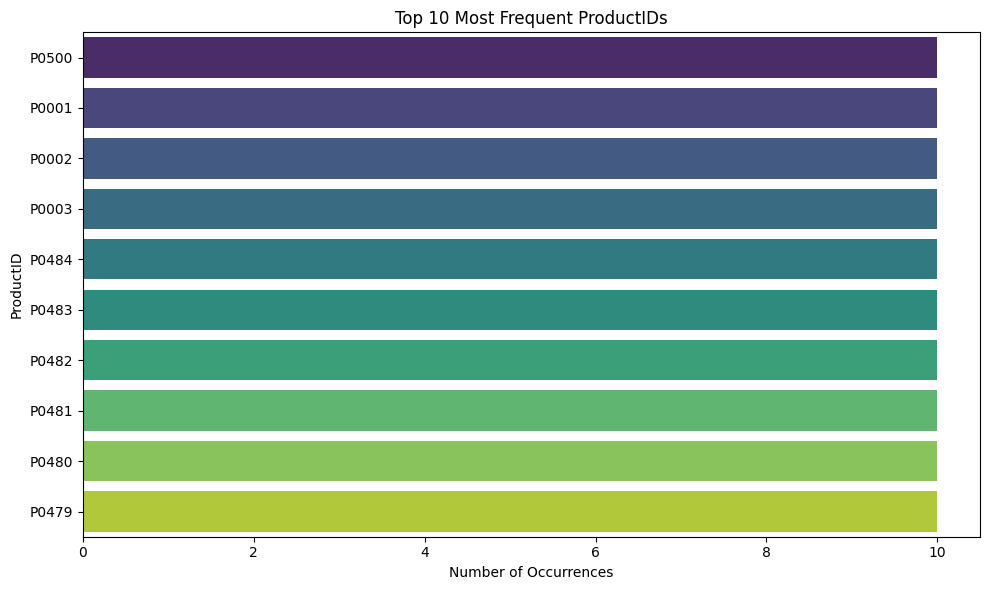

In [6]:
# Count of unique ProductIDs
unique_products = df['ProductID'].nunique()
print(f"Total unique products: {unique_products}")

# Top 10 most frequent ProductIDs
top_products = df['ProductID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index,hue=top_products.index,palette='viridis')
plt.title('Top 10 Most Frequent ProductIDs')
plt.xlabel('Number of Occurrences')
plt.ylabel('ProductID')
plt.tight_layout()
plt.show()


### Top 10 ProductIDs – Key Insights

* All top 10 ProductIDs have exactly **10 occurrences**.
* No single ProductID is more frequent than others — **equal frequency**.
* **Order may be arbitrary**, likely based on sorting or first appearance.
* Suggests possible **sampling, synthetic data**, or a **frequency cap**.


### Location

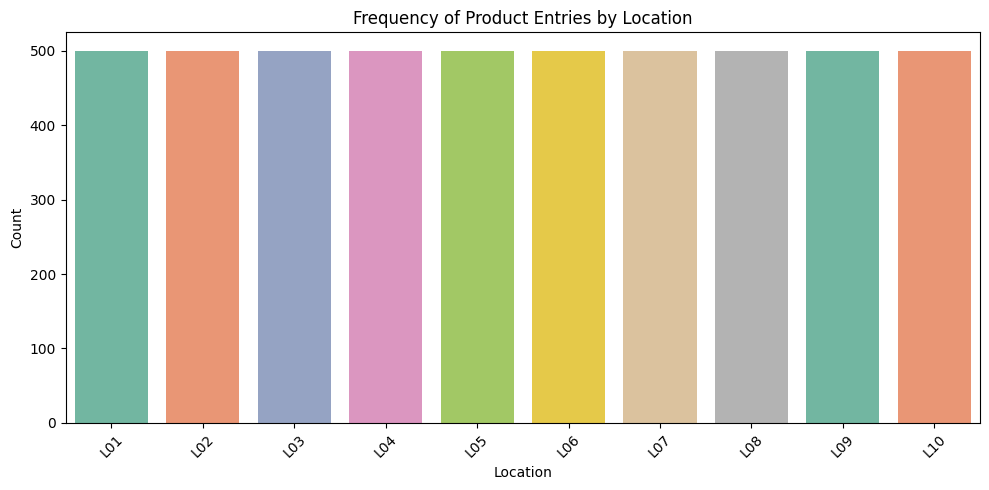

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index,hue='Location',legend=False ,palette='Set2')
plt.title('Frequency of Product Entries by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


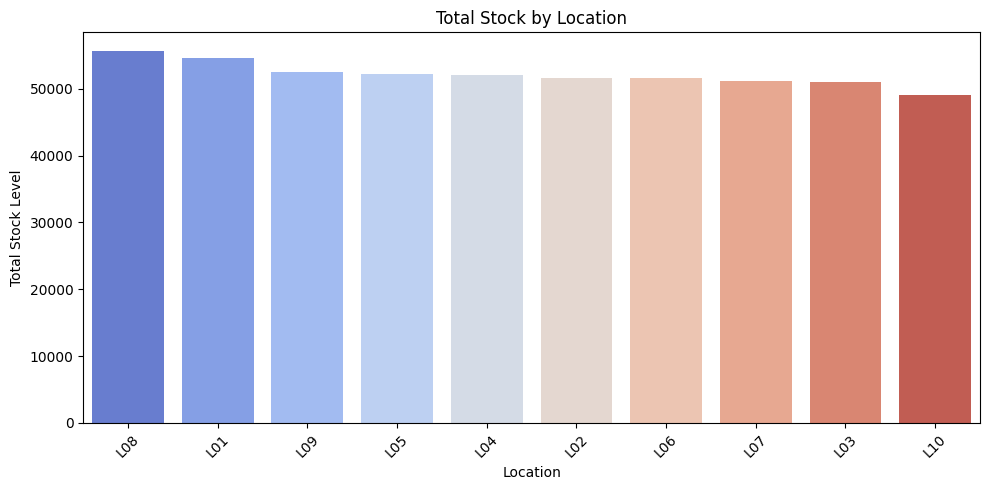

In [8]:
stock_by_location = df.groupby('Location')['StockLevel'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=stock_by_location.index, y=stock_by_location.values,hue=stock_by_location.index,legend=False, palette='coolwarm')
plt.title('Total Stock by Location')
plt.xlabel('Location')
plt.ylabel('Total Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Location-Based Insights

### 1. 'Frequency of Product Entries by Location'
* All locations (L01–L10) have exactly *500* entries.
* Distribution is perfectly uniform — likely sampled or synthetic.
* No location bias in product entries.

### 2. 'Total Stock by Location'
* Stock levels vary across locations.
* Highest: *L08* (~55,000 units), Lowest: *L10* (~49,000 units).
* Ranking: L08 > L01 > L09 > L05 > L04 > L02 > L06 > L07 > L03 > L10.
* Trend: Gradual decline from L08 to L10.

### 🔄 Combined View
* Entry count = same everywhere, but stock differs.
* L08 may stock large-quantity/slow-moving items.
* L10 may handle fast-moving/small-quantity products.
* Suggests differences in inventory turnover or item types.


# 3. Bivariate Analysis

## 3.1. StockLevel & ProductID

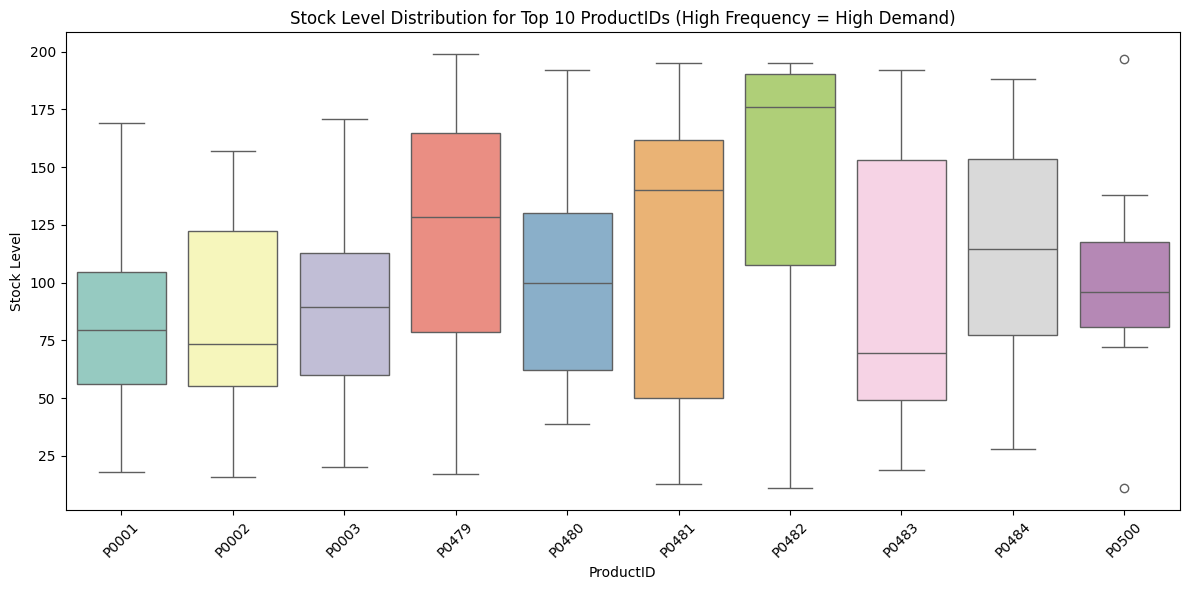

In [9]:
# Get Top 10 products by frequency
top_products = df['ProductID'].value_counts().head(10).index
filtered_df = df[df['ProductID'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='ProductID', y='StockLevel',hue='ProductID',legend=False, palette='Set3')
plt.title('Stock Level Distribution for Top 10 ProductIDs (High Frequency = High Demand)')
plt.xlabel('ProductID')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📦 Stock Level Insights: Top 10 High-Demand Products

* Stock levels vary widely despite all being high-demand.
* **P0482** maintains highest typical stock (~180), **P0002** and **P0483** the lowest (~70).
* Volatility differs: **P0003** and **P0480** = stable; **P0479**, **P0481**, **P0483** = fluctuating.
* **P0500** has an outlier (very low stock) — possibly stockout or anomaly.
* Skewness exists (e.g., **P0483** is right-skewed); ranges also differ across products.


## 3.2. SupplierDelay(days) & StockLevel

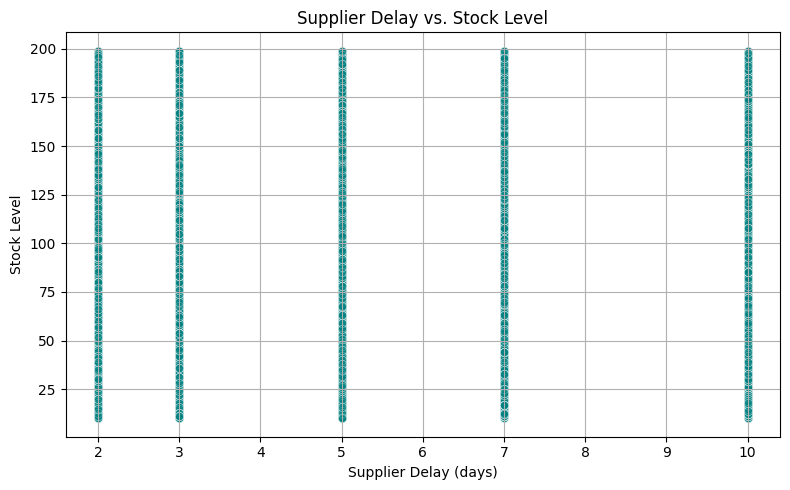

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='SupplierDelay(days)', y='StockLevel', alpha=0.6, color='teal')
plt.title('Supplier Delay vs. Stock Level')
plt.xlabel('Supplier Delay (days)')
plt.ylabel('Stock Level')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📉 Supplier Delay vs. Stock Level

* **Discrete Delays:** Only specific delays (2, 3, 5, 7, 10 days) observed.
* **No Correlation:** Stock levels vary widely at each delay — no visible link.
* **Uniform Spread:** Stock levels are evenly distributed for all delay values.
* **Independent Strategy:** Suggests stock levels are managed independently of delay durations.


## 3.3. SupplierDelay(days) & ProductID

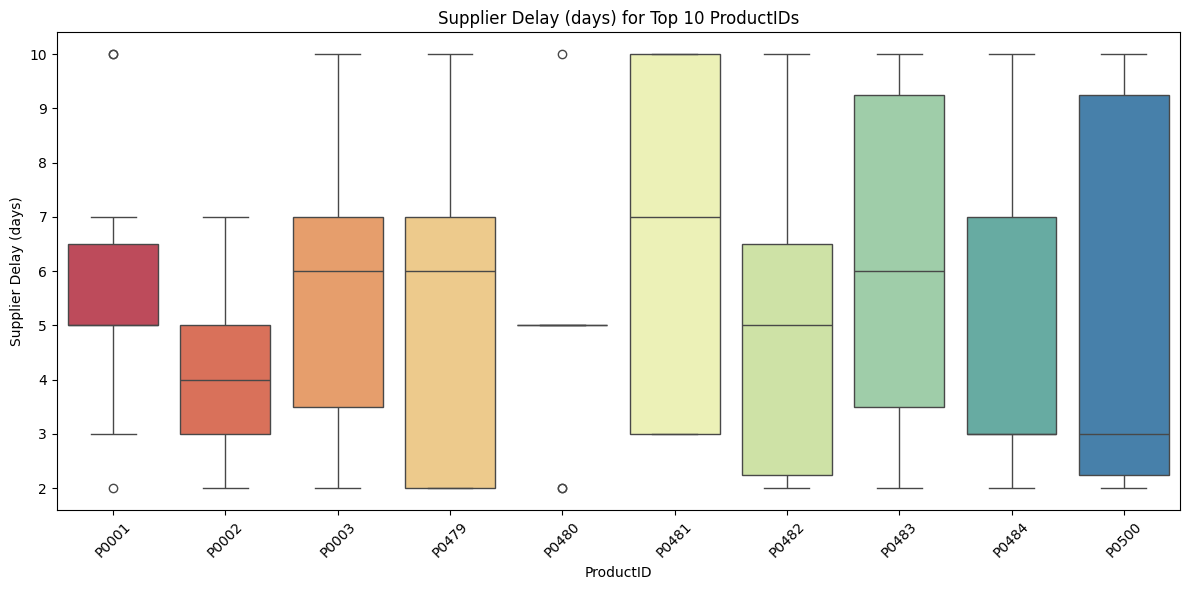

In [11]:
# Top 10 products by frequency
top_products = df['ProductID'].value_counts().head(10).index
filtered_df = df[df['ProductID'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='ProductID', y='SupplierDelay(days)',hue='ProductID',legend=False, palette='Spectral')
plt.title('Supplier Delay (days) for Top 10 ProductIDs')
plt.xlabel('ProductID')
plt.ylabel('Supplier Delay (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📦 Supplier Delay (days) – Top 10 ProductIDs (Boxplot)

### 🔍 Key Insights:

- **Variation Across Products:**  
  - 🔄 Wide delay ranges: *P0481, P0483, P0484, P0500*  
  - 📏 Consistent delays: *P0480, P0002*

- **Median Delays:**  
  - 🟢 Lowest: *P0002 (~4 days)*  
  - 🔴 Highest: *P0481 (~7 days)*

- **Outliers Noted:**  
  - *P0001 (10d), P0480 (2d & 10d), P0481 (10d)*

- **Skewness:**  
  - ➡️ Right: *P0481, P0483, P0484*  
  - ⬅️ Left: *P0001*  
  - 🔄 Symmetric: *P0003, P0479*

- **Interesting Case:**  
  - *P0480*: Mostly fixed 5-day delay → very consistent supplier


## 3.4. Location & StockLevel


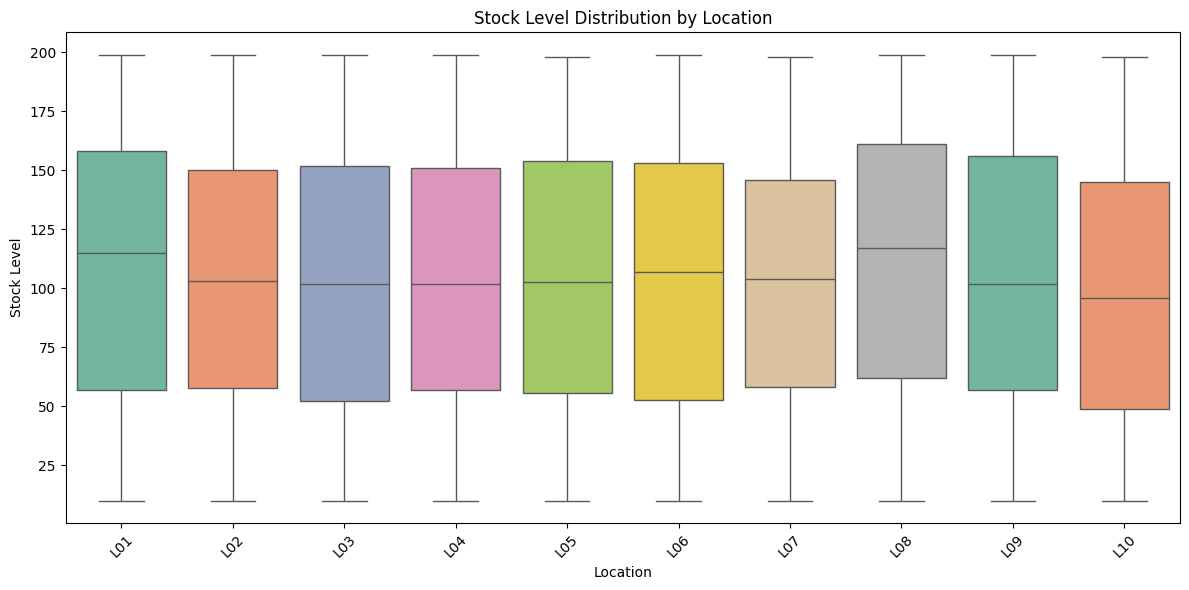

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='StockLevel',hue='Location',legend=False ,palette='Set2')
plt.title('Stock Level Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Stock Level Distribution by Location (Boxplot)

### Key Insights:

- **Highest Median:** L08 (~120 units)
- **Others:** Most locations ~100–110 units

- **Spread (IQR):** Similar across all (~80–100 units)

- **Range:** 10–200 units, no outliers

- **L08:** Slightly higher stock overall

### Conclusion:

Most locations have similar stock patterns. **L08** holds consistently higher stock levels.


## 3.5. Warehouse & StockLevel

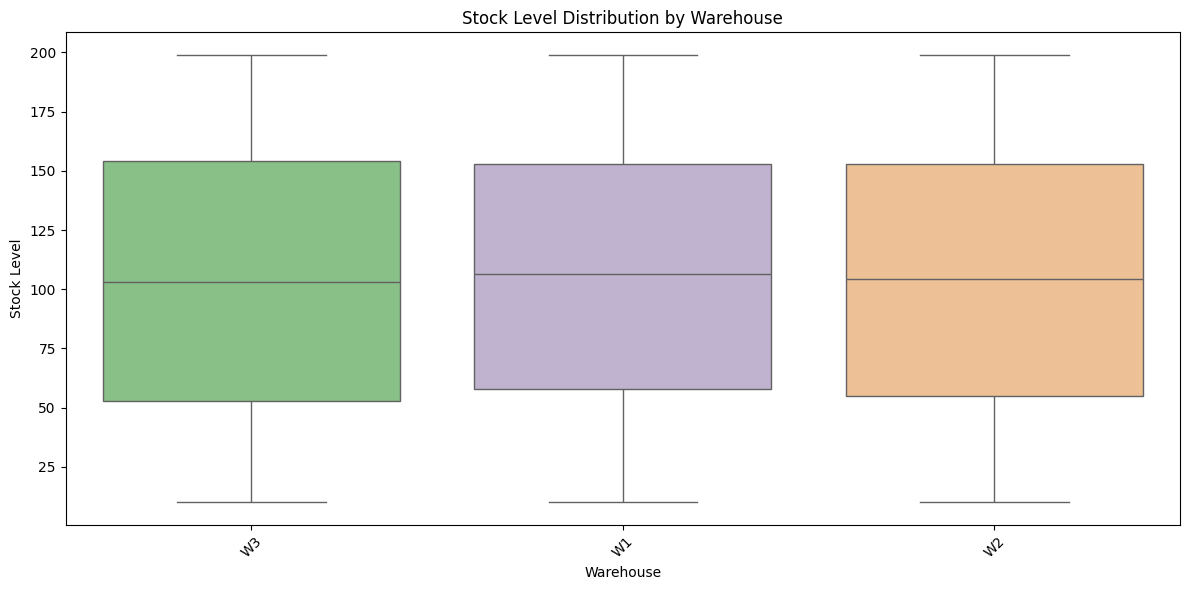

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Warehouse', y='StockLevel',hue='Warehouse',legend=False, palette='Accent')
plt.title('Stock Level Distribution by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📦 Stock Level Distribution by Warehouse (Boxplot)

### 🔍 Key Insights:

- **Medians Consistent:** All warehouses (W1, W2, W3) show similar medians (~105–110 units).
- **Spread (IQR):** Identical across warehouses (~55–155 units).
- **Range:** Full range from ~10 to 200 units for all.
- **No Outliers:** No extreme stock level values.
- **Symmetry:** All distributions are symmetrical.

### ✅ Conclusion:

Stock levels are **uniformly managed** across W1, W2, and W3 — indicating consistent inventory policies.


### 3.6. InventoryType & StockLevel

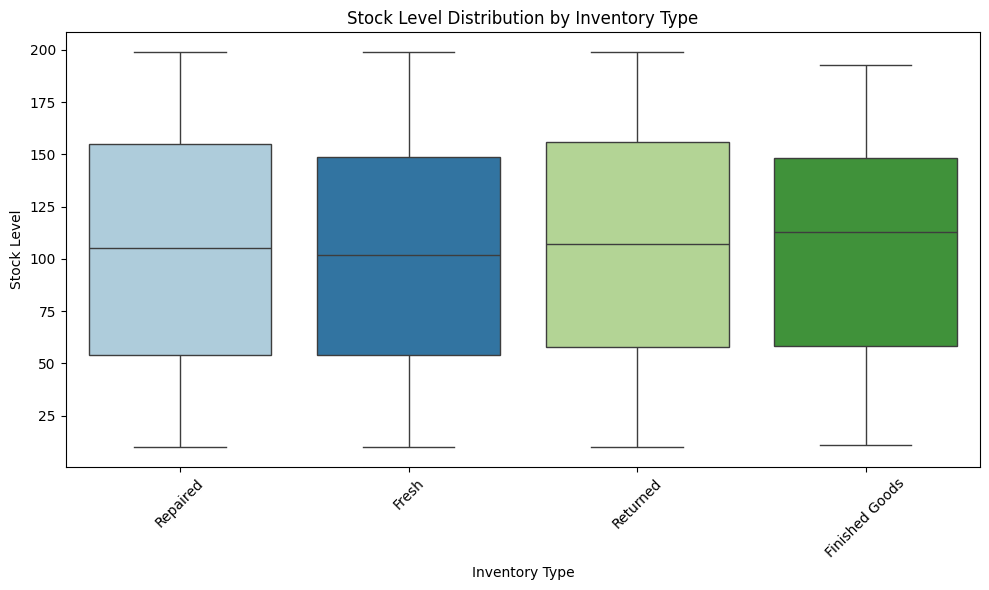

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='InventoryType', y='StockLevel',hue='InventoryType',legend=False, palette='Paired')
plt.title('Stock Level Distribution by Inventory Type')
plt.xlabel('Inventory Type')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Stock Level by Inventory Type (Boxplot)

- **Range:** All types ~10–200 units.
- **Median:** Similar (~105–120); Finished Goods slightly higher.
- **Spread (IQR):** 
  - Repaired = most variation.
  - Returned & Finished = more consistent.
- **No outliers.**
- **Skew:** Returned & Finished slightly right-skewed.

**→ Repaired stock is most variable; Finished Goods more stable & slightly higher.**


# Multivariate Analysis

## 4.1. StockLevel, SupplierDelay, and ProductID

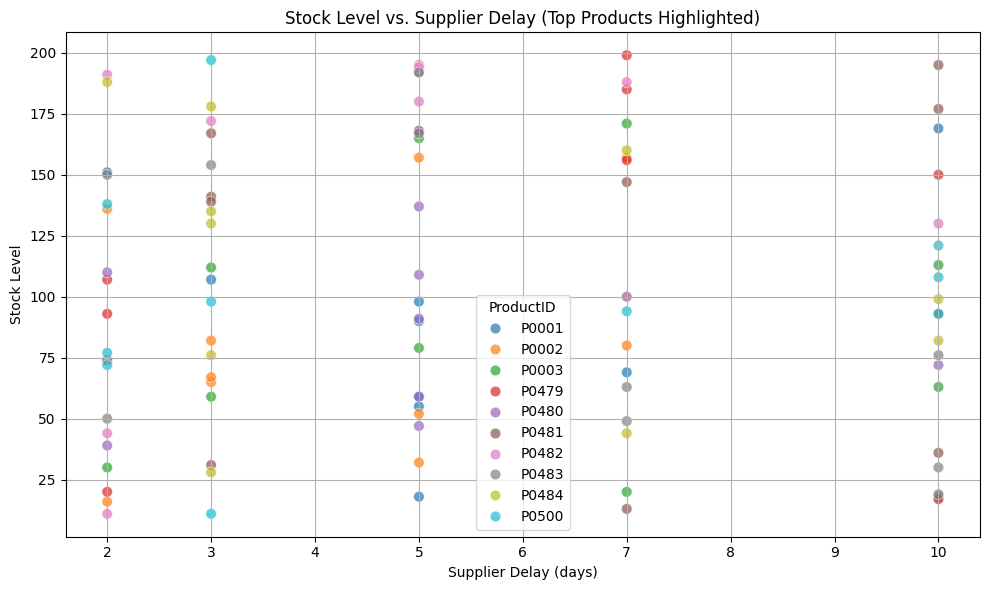

In [17]:
# Select Top 10 ProductIDs by frequency
top_products = df['ProductID'].value_counts().head(10).index
filtered_df = df[df['ProductID'].isin(top_products)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='SupplierDelay(days)',
    y='StockLevel',
    hue='ProductID',
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.title('Stock Level vs. Supplier Delay (Top Products Highlighted)')
plt.xlabel('Supplier Delay (days)')
plt.ylabel('Stock Level')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Stock Level vs. Supplier Delay – Scatter Plot (Top Products)

- **Discrete Delays:** Only 2, 3, 5, 7, 10 days.
- **No Overall Correlation** between delay & stock level.
- **Product-wise Variations:**
  - **P0482:** Higher stock across delays.
  - **P0002:** Lower stock levels.
  - **P0500:** Very low stock at 10-day delay (outlier).
- **Overlap:** Many products share similar stock at same delay.
- **Inventory Insight:** Stock strategy seems product-specific, not solely delay-based.


## 4.2. Location, Warehouse, and StockLevel/SupplierDelay

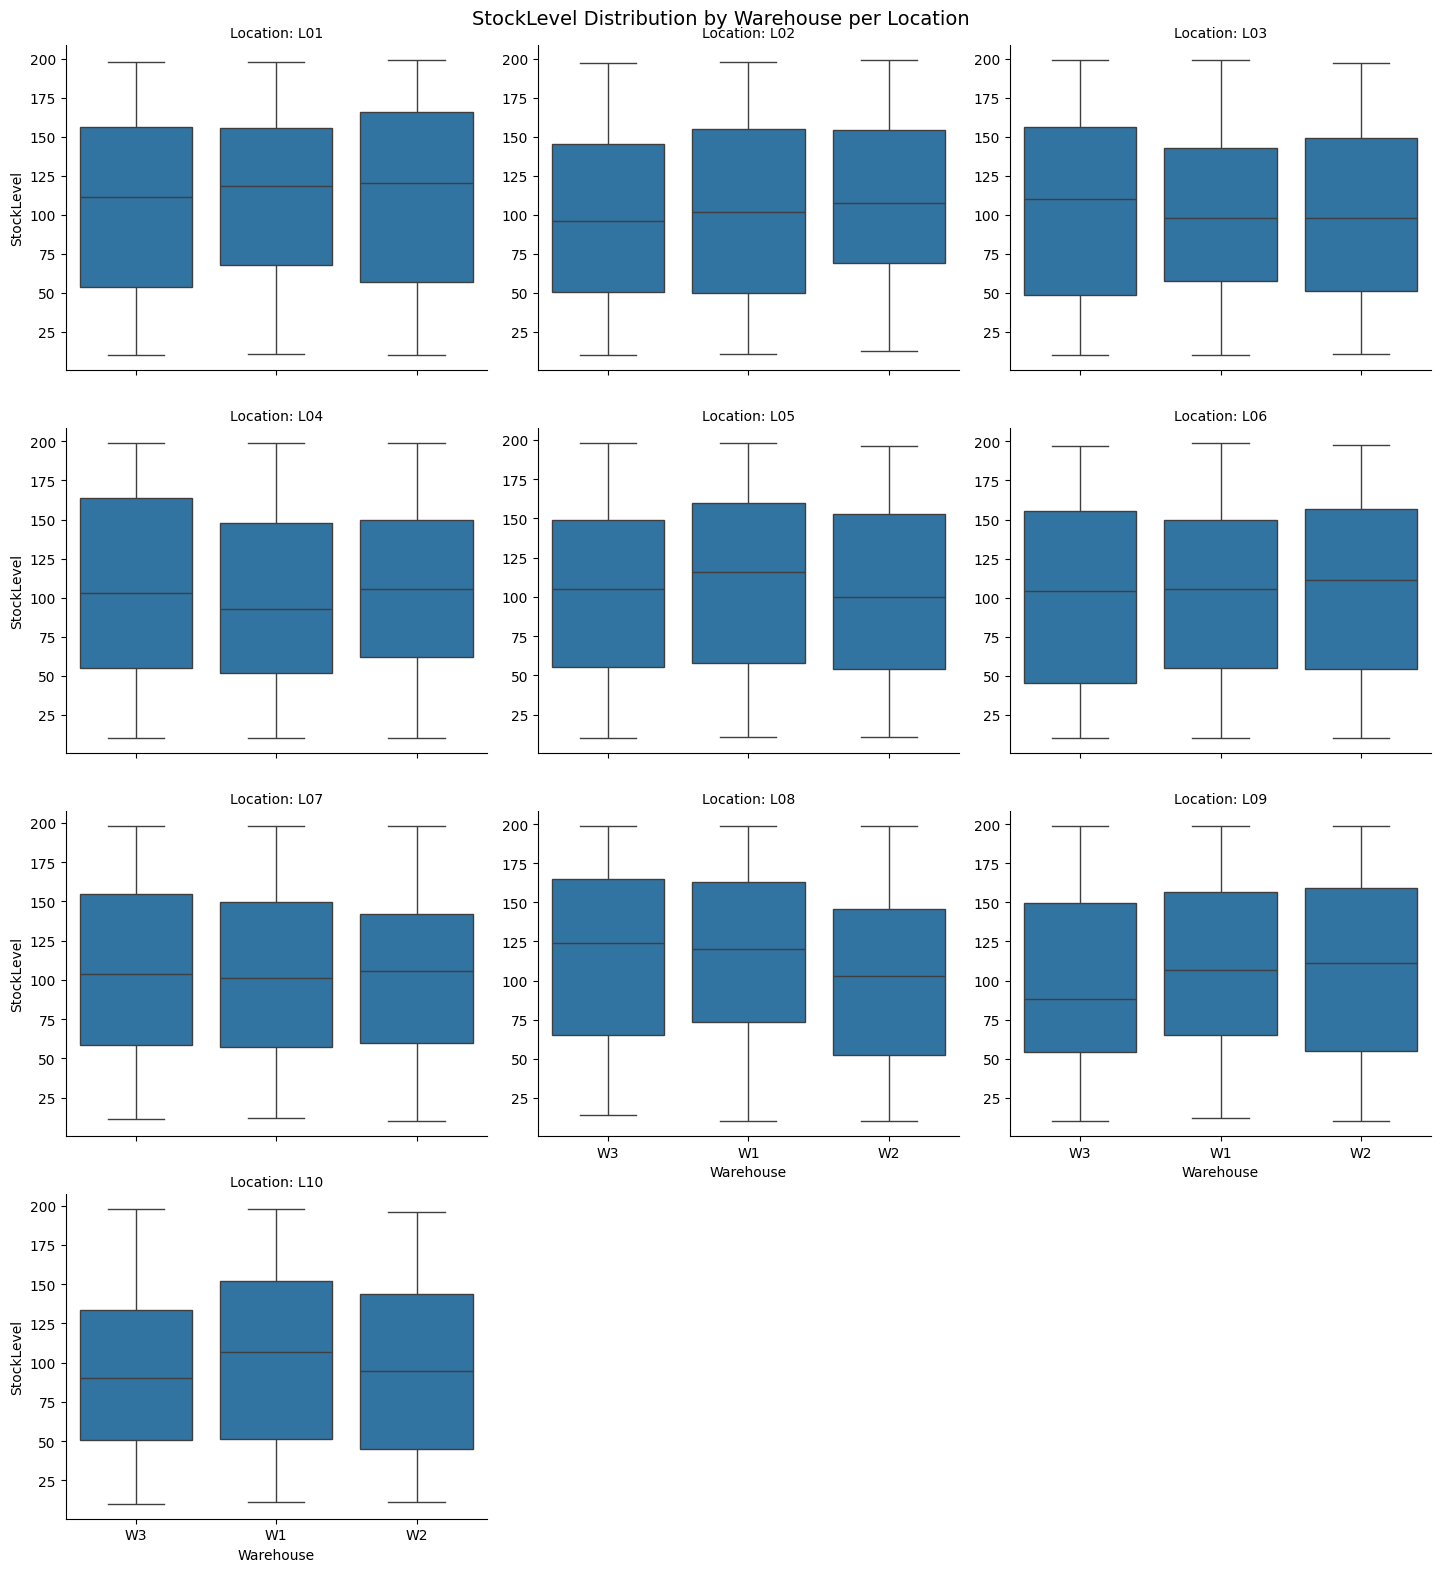

In [18]:
# Faceted boxplot: StockLevel by Warehouse, faceted by Location
g = sns.catplot(
    data=df,
    x='Warehouse',
    y='StockLevel',
    col='Location',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False
)
g.set_titles("Location: {col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("StockLevel Distribution by Warehouse per Location", fontsize=14)
plt.tight_layout()
plt.show()


### 📦 Stock Level Distribution by Warehouse per Location

- **Uniform Within Locations:** W1, W2, W3 have nearly identical stock distributions in each location (L01–L10).
- **Wide Range:** Stock levels range from ~15 to ~200 units.
- **No Outliers:** All boxplots show clean distributions.
- **Minor Variation Across Locations:** Slightly higher medians in L08; L10 and L02 show lower medians.
- **Standardized Management:** Indicates centralized or coordinated stock practices within each location.

🔍 **Key Insight:** Warehouse ID (W1/W2/W3) doesn't influence stock levels—location is the main driver.


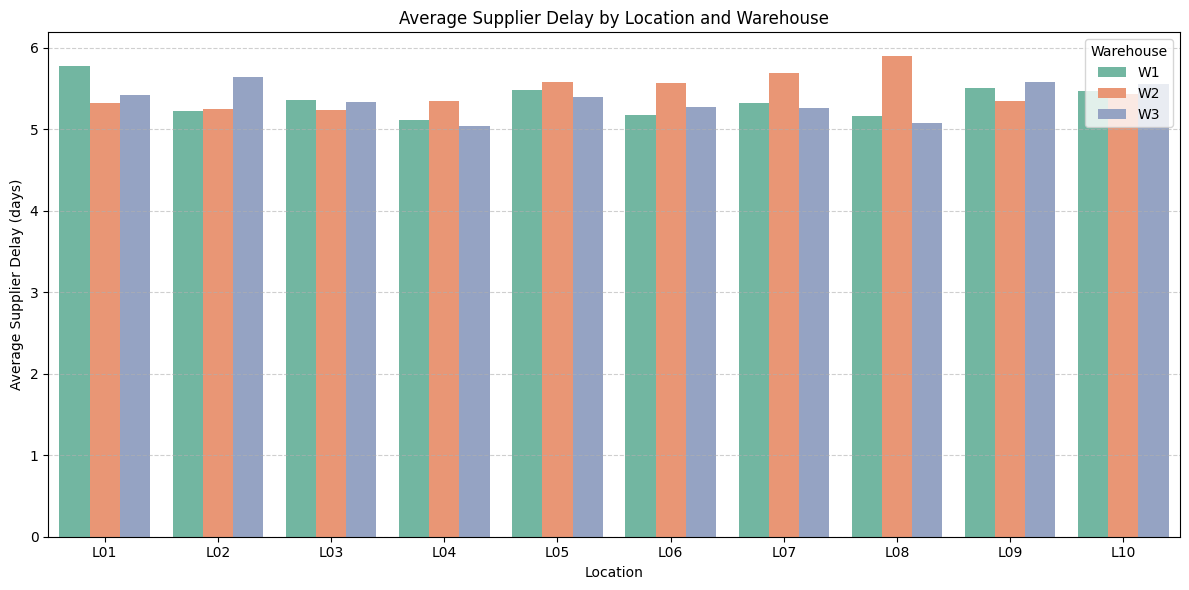

In [19]:
# Compute mean supplier delay
grouped_delay = df.groupby(['Location', 'Warehouse'])['SupplierDelay(days)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_delay,
    x='Location',
    y='SupplierDelay(days)',
    hue='Warehouse',
    palette='Set2'
)
plt.title('Average Supplier Delay by Location and Warehouse')
plt.ylabel('Average Supplier Delay (days)')
plt.xlabel('Location')
plt.legend(title='Warehouse')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🚚 Avg. Supplier Delay by Location & Warehouse

- **Stable Delays:** Avg. delays range narrowly between **5.0–6.0 days** across all locations and warehouses.
- **Minor Warehouse Differences:**
  - **W2** shows slightly higher delays in L05–L08.
  - **W1** has the highest delay in L01 (~5.8 days).
  - **W3** mostly aligns with W1.
- **Location Trends:**
  - **L08-W2** has the highest avg. delay (~6.0 days).
  - **L02** shows lowest avg. delays overall.
- **No Outliers:** Delay values are consistent—no major bottlenecks or standout performers.

✅ **Conclusion:** Supplier delays are uniformly managed with minimal variation across warehouses and locations.
